In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

# Preprocessing data

In [ ]:
batch_size = 128
num_classes = 10
epochs = 1
img_rows, img_cols = 28, 28

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
x_train /= 255
x_test /=255

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=keras.activations.softmax))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 72s 154ms/step - loss: 0.3699 - accuracy: 0.8902 - val_loss: 0.2329 - val_accuracy: 0.9329
Epoch 2/30
469/469 [==============================] - 78s 167ms/step - loss: 0.3675 - accuracy: 0.8887 - val_loss: 0.2317 - val_accuracy: 0.9330
Epoch 3/30
469/469 [==============================] - 83s 177ms/step - loss: 0.3646 - accuracy: 0.8899 - val_loss: 0.2300 - val_accuracy: 0.9340
Epoch 4/30
469/469 [==============================] - 95s 202ms/step - loss: 0.3630 - accuracy: 0.8913 - val_loss: 0.2283 - val_accuracy: 0.9347
Epoch 5/30
469/469 [==============================] - 93s 199ms/step - loss: 0.3615 - accuracy: 0.8927 - val_loss: 0.2269 - val_accuracy: 0.9339
Epoch 6/30
469/469 [==============================] - 89s 189ms/step - loss: 0.3631 - accuracy: 0.8912 - val_loss: 0.2255 - val_accuracy: 0.9351
Epoch 7/30
469/469 [==============================] - 89s 190ms/step - loss: 0.3584 - accuracy: 0.8917 - val_loss: 0.2241 - val_ac

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print(score)

313/313 [==============================] - 3s 9ms/step - loss: 0.1961 - accuracy: 0.9426
[0.1960824429988861, 0.9426000118255615]


# SHAP

In [ ]:
import shap

In [ ]:
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
explication = shap.DeepExplainer(model, background)

In [ ]:
tf.autograph.experimental.do_not_convert
shap_values = explication.shap_values(x_test[1:5])

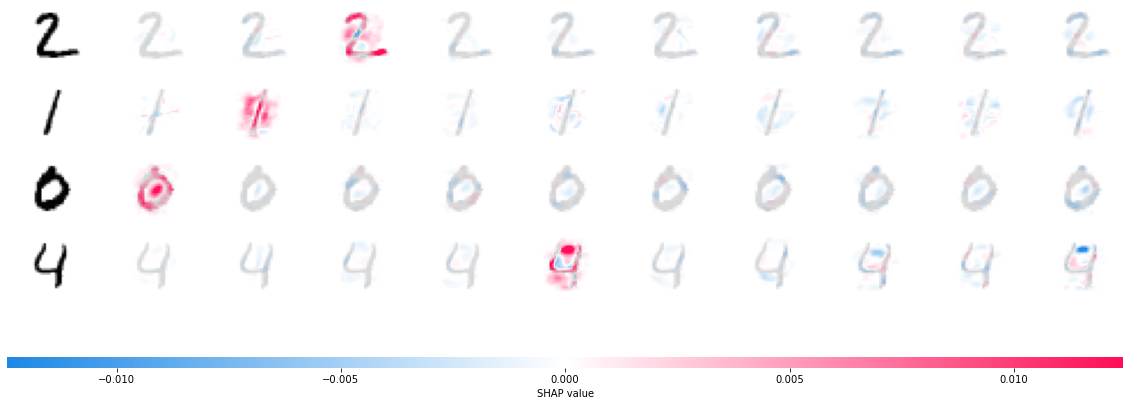

In [ ]:
shap.image_plot(shap_values, -x_test[1:5])